In [1]:
# imports framework
import sys,os

from evoman.environment import Environment
from demo_controller import player_controller

# imports other libs
import numpy as np


pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [13]:
experiment_name = 'A1'
if not os.path.exists(experiment_name):
    os.makedirs(experiment_name)

NUM_HIDDEN_NEURONS = 0
env = Environment(experiment_name=experiment_name,
				  playermode="ai",
				  player_controller=player_controller(NUM_HIDDEN_NEURONS),
		  		  speed="normal",
				  enemymode="static",
				  level=2
                  
				  ,visuals=True # defualt: False
                  )


MESSAGE: Pygame initialized for simulation.


In [14]:

sol = np.loadtxt('solutions_demo/demo_all.txt')
print('\n LOADING SAVED GENERALIST SOLUTION FOR ALL ENEMIES \n')

# tests saved demo solutions for each enemy
for en in range(1, 9):
	
	#Update the enemy
	env.update_parameter('enemies',[en])
	# print(.shape) ; break
	# sol = np.random.normal(0,.5,105)
	env.play(sol)
	print(env.fitness_single())
	break



 LOADING SAVED GENERALIST SOLUTION FOR ALL ENEMIES 


PARAMETER CHANGE: enemies = [1]
3.2254484544555915


# Analyse Results

Fitness Score:
$$\begin{align*}
& f =  0.9 ∗ (100 − e_e) + 0.1∗ e_p − log t \\
& f =  0.9 ∗ (100 − e_e) + 0.1∗ e_p − log t \\
\end{align*}$$
<!-- 0.9*(100 - self.get_enemylife()) + 0.1*self.get_playerlife() - numpy.log(self.get_time()) -->


In [ ]:
fitness

/var/folders/57/8q11hb450rz9z_rwvfbzpkmm0000gn/T/ipykernel_66487/4077040516.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x))


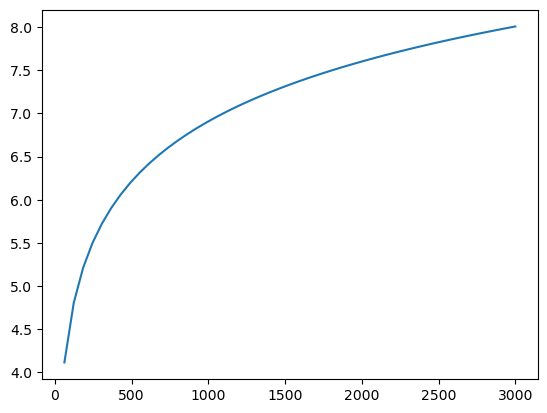

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,3000)
plt.plot(x, np.log(x))

In [15]:
import plotly.express as px
import pandas as pd

In [21]:
experiment_name = 'A1'

# Plot Evolution
resutls_df = pd.read_csv(experiment_name + "/results.txt", sep=' ')
# resutls_df = resutls_df.set_index('gen')
resutls_df

px.line(resutls_df, x="gen", y=["best", "mean"], labels={"value": "Performance"})
# px.show()


: 

In [7]:
import numpy as np
np.mean([ i%2==0 for i in range(1, 11) ])

0.5

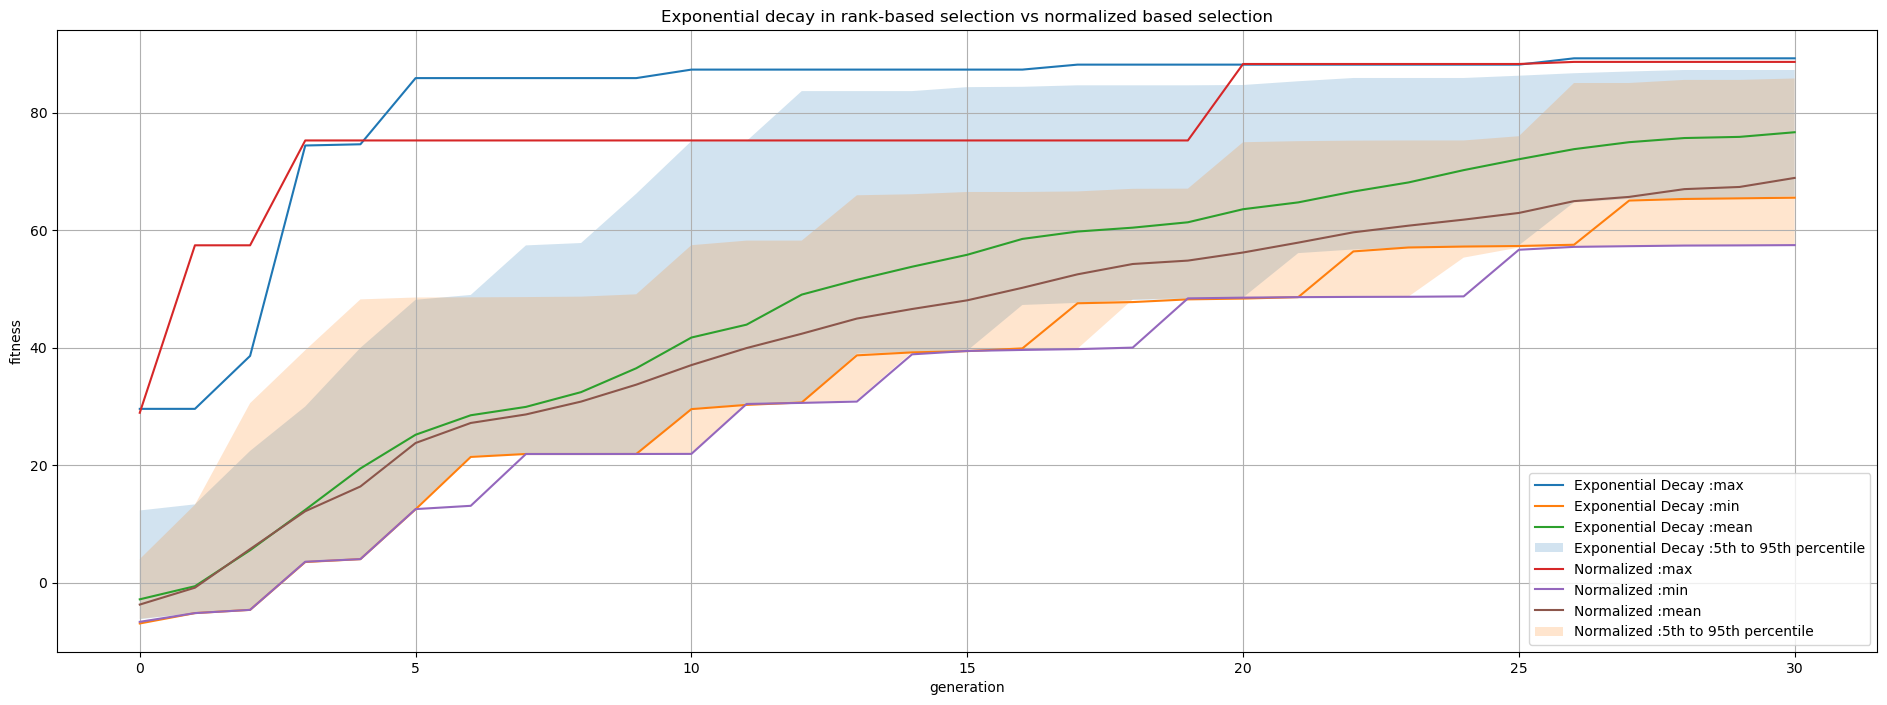

In [29]:
# load csv file named as A3_2023-09-19 14:23:09.csv and plot the results using plotly
import pandas as pd
import matplotlib.pyplot as plt

file = 'A3/A3_2023-09-19 14:40:41.csv'
file2 = 'A3/A3_2023-09-19 14:41:55.csv'

# Plot Evolution
resutls_df = pd.read_csv(file)
plt.plot(resutls_df['generation'], resutls_df['max'], label='Exponential Decay :max')
plt.plot(resutls_df['generation'], resutls_df['min'], label='Exponential Decay :min')
plt.plot(resutls_df['generation'], resutls_df['mean'], label='Exponential Decay :mean')
plt.fill_between(resutls_df['generation'], resutls_df['q5'], resutls_df['q95'], label='Exponential Decay :5th to 95th percentile', alpha=0.2)

# do the same for the second file
resutls_df = pd.read_csv(file2)
plt.plot(resutls_df['generation'], resutls_df['max'], label='Normalized :max')
plt.plot(resutls_df['generation'], resutls_df['min'], label='Normalized :min')
plt.plot(resutls_df['generation'], resutls_df['mean'], label='Normalized :mean')
plt.fill_between(resutls_df['generation'], resutls_df['q5'], resutls_df['q95'], label='Normalized :5th to 95th percentile', alpha=0.2)


plt.legend()
# use tight layout and resize it to 20,7
plt.tight_layout()
plt.gcf().set_size_inches(20, 7)
# add y label as 'fitness' and x label as 'generation' and title "Evolution of the fitness for A3"
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title('Exponential decay in rank-based selection vs normalized based selection')
plt.grid()
plt.show()

In [11]:
import numpy as np
import itertools

# Initialize the distance matrix
# Use np.inf for unreachable paths and 0 for diagonal elements
distance_matrix = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])

np.random.seed(0)

# Generate a 10x10 distance matrix with random integers between 1 and 100
n = 11
distance_matrix = np.random.randint(1, 101, size=(n, n))

# Set diagonal elements to 0 (distance from a city to itself should be 0)
np.fill_diagonal(distance_matrix, 0)

# Make the matrix symmetric (distance from i to j is the same as from j to i)
distance_matrix = (distance_matrix + distance_matrix.T) // 2

print("Generated 10x10 Distance Matrix:")
print(distance_matrix)

# Number of cities
n = len(distance_matrix)

# Floyd's Algorithm to find shortest paths between all pairs of cities
for k in range(n):
    for i in range(n):
        for j in range(n):
            distance_matrix[i][j] = min(distance_matrix[i][j], distance_matrix[i][k] + distance_matrix[k][j])

# Generate all possible routes starting and ending at city 0
routes = list(itertools.permutations(range(1, n)))
# print(routes)

# Initialize variables to keep track of the shortest route and its cost
shortest_route = None
min_cost = np.inf

# Evaluate the cost of each route and find the shortest one
for route in routes:
    cost = 0
    current_city = 0  # Start at city 0
    for next_city in route:
        cost += distance_matrix[current_city][next_city]
        current_city = next_city
    cost += distance_matrix[current_city][0]  # Return to city 0

    if cost < min_cost:
        min_cost = cost
        shortest_route = route

# Output the shortest route and its cost
print(f"Shortest route: {shortest_route}")
print(f"Minimum cost: {min_cost}")


Generated 10x10 Distance Matrix:
[[ 0 68 45 84 63  5 43 61 57 68 54]
 [68  0 45 74 49 38 77 50 71 66 36]
 [45 45  0 30 26 67 56 46 63 67 66]
 [84 74 30  0 47 13 36 41 24 54 52]
 [63 49 26 47  0 37 56 70 25 35  2]
 [ 5 38 67 13 37  0 46 40 71 62 65]
 [43 77 56 36 56 46  0 76 75 48 29]
 [61 50 46 41 70 40 76  0 46 59 41]
 [57 71 63 24 25 71 75 46  0 54 54]
 [68 66 67 54 35 62 48 59 54  0 62]
 [54 36 66 52  2 65 29 41 54 62  0]]
Shortest route: (1, 2, 7, 9, 6, 10, 4, 8, 3, 5)
Minimum cost: 339


In [35]:
from optimization_dummy import main as our_main
from importlib import reload
# reload(our_main)
import numpy as np
from tqdm import tqdm, trange

pfit_dict = None
for run in trange(1,11):
        _temp_dict = our_main(
                # initializatio of Neural Network
                n_hidden_neurons = 10,
                domain_upper = 2,
                domain_lower = -2,

                # initialization of pupulation and population parameters
                pop_size = 100,
                gens = 30,
                mutation_rate = 0.2,

                run = run
        )
        if run == 1: pfit_dict = _temp_dict
        else:
                for key in pfit_dict:
                        pfit_dict[key] += _temp_dict[key]


  0%|          | 0/10 [00:00<?, ?it/s]


MESSAGE: Pygame initialized for simulation.
Initializing new population...
>>Win Ratio: 0.00 %
>>Win Ratio: 0.00 %

 GENERATION 0 best: 30.566278 mean: 3.555906 std: 9.34504

MESSAGE: state has been saved to files.
>>Win Ratio: 0.00 %

 GENERATION 1 best: 39.570654 mean: 10.723121 std: 9.265764

MESSAGE: state has been saved to files.
>>Win Ratio: 0.00 %

 GENERATION 2 best: 86.339599 mean: 19.727976 std: 14.263475

MESSAGE: state has been saved to files.
>>Win Ratio: 0.00 %

 GENERATION 3 best: 86.339599 mean: 28.79157 std: 13.475976

MESSAGE: state has been saved to files.
>>Win Ratio: 0.00 %

 GENERATION 4 best: 86.339599 mean: 32.847999 std: 14.286227

MESSAGE: state has been saved to files.
>>Win Ratio: 0.00 %

 GENERATION 5 best: 86.339599 mean: 38.129804 std: 15.554645

MESSAGE: state has been saved to files.
>>Win Ratio: 0.00 %

 GENERATION 6 best: 86.35704 mean: 43.31244 std: 14.722683

MESSAGE: state has been saved to files.
>>Win Ratio: 0.00 %

 GENERATION 7 best: 86.35704 

 10%|█         | 1/10 [01:13<11:02, 73.57s/it]

>>Win Ratio: 0.00 %

 GENERATION 29 best: 89.428142 mean: 87.037273 std: 0.719771

MESSAGE: state has been saved to files.
raw_pfit: {'generation': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 20%|██        | 2/10 [02:34<10:23, 77.96s/it]

>>Win Ratio: 0.00 %

 GENERATION 29 best: 88.860907 mean: 77.033975 std: 7.652638

MESSAGE: state has been saved to files.
raw_pfit: {'generation': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 30%|███       | 3/10 [03:43<08:38, 74.04s/it]

>>Win Ratio: 0.00 %

 GENERATION 29 best: 89.440945 mean: 81.155132 std: 5.252458

MESSAGE: state has been saved to files.
raw_pfit: {'generation': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 40%|████      | 4/10 [04:55<07:18, 73.08s/it]

>>Win Ratio: 0.00 %

 GENERATION 29 best: 90.031733 mean: 76.915435 std: 7.297869

MESSAGE: state has been saved to files.
raw_pfit: {'generation': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 50%|█████     | 5/10 [06:10<06:09, 73.87s/it]

>>Win Ratio: 0.00 %

 GENERATION 29 best: 88.296168 mean: 80.795847 std: 5.141779

MESSAGE: state has been saved to files.
raw_pfit: {'generation': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 60%|██████    | 6/10 [07:13<04:40, 70.09s/it]

>>Win Ratio: 0.00 %

 GENERATION 29 best: 88.652828 mean: 74.885331 std: 8.731359

MESSAGE: state has been saved to files.
raw_pfit: {'generation': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 70%|███████   | 7/10 [08:42<03:48, 76.11s/it]

>>Win Ratio: 0.00 %

 GENERATION 29 best: 89.531439 mean: 73.145595 std: 10.710175

MESSAGE: state has been saved to files.
raw_pfit: {'generation': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

 80%|████████  | 8/10 [09:50<02:27, 73.58s/it]

>>Win Ratio: 0.00 %

 GENERATION 29 best: 90.156796 mean: 82.596553 std: 4.832761

MESSAGE: state has been saved to files.
raw_pfit: {'generation': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 90%|█████████ | 9/10 [10:58<01:12, 72.00s/it]

>>Win Ratio: 0.00 %

 GENERATION 29 best: 90.271733 mean: 79.18692 std: 6.752344

MESSAGE: state has been saved to files.
raw_pfit: {'generation': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

100%|██████████| 10/10 [12:05<00:00, 72.54s/it]

>>Win Ratio: 0.00 %

 GENERATION 29 best: 88.258532 mean: 73.535662 std: 7.886963

MESSAGE: state has been saved to files.
raw_pfit: {'generation': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [36]:
# create df from pfit_dict and save it to csv named "standard normilization 10 runs pop size 100.csv"
import pandas as pd
df = pd.DataFrame(pfit_dict)
df.to_csv("standard normilization 10 runs pop size 100 - random std noise.csv")


: 

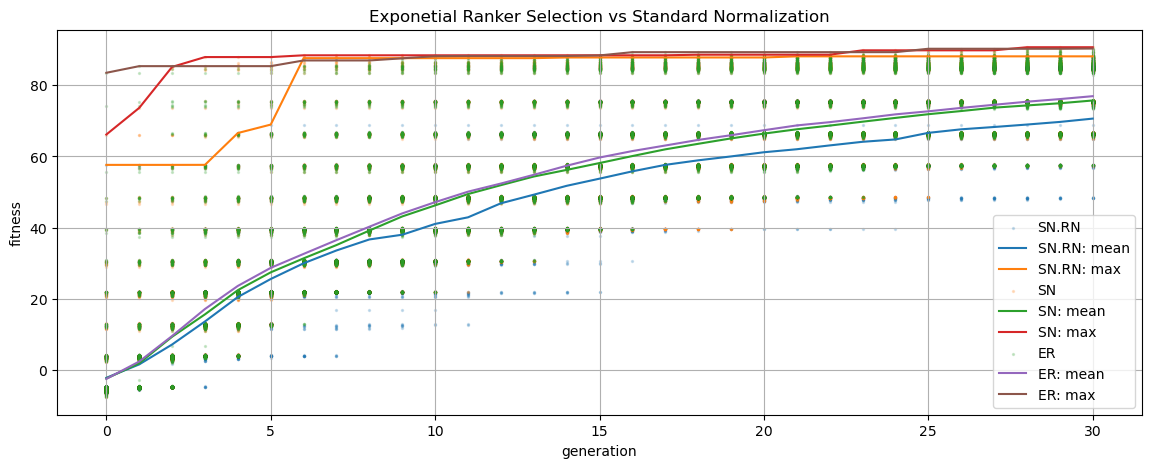

SN                    ER           
                 mean        max       mean        max
generation                                            
0           -2.372535  66.171054  -2.468615  83.514211
1            1.936190  73.655927   2.419496  85.377803
2            9.365620  85.164591   9.579916  85.377803
3           15.663626  87.927394  17.164353  85.377803
4           22.463641  87.927394  23.649595  85.377803
5           27.461467  87.927394  28.722442  85.377803
6           31.388641  88.424258  32.638251  86.976168
7           35.125742  88.424258  36.511218  86.976168
8           39.200193  88.424258  40.274928  86.976168
9           43.165681  88.424258  44.016306  87.576168
10          46.262856  88.424258  47.174275  88.179575
11          49.449863  88.424258  50.118993  88.244063
12          51.947606  88.424258  52.405525  88.244063
13          54.376382  88.424258  54.855149  88.244063
14          56.232286  88.424258  57.406696  88.244063
15          58.159600  88.424258  59.708251  88.389158
16          60.125330  88.424258  61.529654  89.308354
17          62.010899  88.424258  63.083474  89.308354
18          63.560492  88.595317  64.654439  89.308354
19          65.080732  88.595317  65.977013  89.308354
20          66.427072  88.595317  67.383994  89.308354
21          67.646667  88.595317  68.727426  89.308354
22          68.675426  88.595317  69.644301  89.308354
23          69.777152  89.821921  70.715528  89.308354
24          70.840293  89.821921  71.837243  89.308354
25          71.877271  89.821921  72.692891  90.261683
26          72.767287  89.821921  73.647845  90.261683
27          73.714426  89.821921  74.523350  90.261683
28          74.341107  90.692892  75.391071  90.261683
29          74.952622  90.692892  76.124488  90.261683
30          75.733152  90.692892  76.941712  90.321762

In [34]:

#make df from raw_pfit_store
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("standard normilization 10 runs pop size 100 - random std noise.csv").sample(frac=1)
df2 = df.groupby(['generation'])['pfit'].agg(['mean', 'max']).reset_index()

# make matplotlib scatter plot from df with x='generation' and y='pfit'
plt.scatter(df['generation'], df['pfit'], alpha=0.2, s=2, label='SN.RN')
plt.plot(df2['generation'], df2['mean'], label='SN.RN: mean')
plt.plot(df2['generation'], df2['max'], label='SN.RN: max')


# load df from csv named 'standard normilization 10 runs pop size 10.csv'
df = pd.read_csv('standard normilization 10 runs pop size 100.csv').sample(frac=1)
df2 = df.groupby(['generation'])['pfit'].agg(['mean', 'max']).reset_index()

# make matplotlib scatter plot from df with x='generation' and y='pfit'
plt.scatter(df['generation'], df['pfit'], alpha=0.2, s=2, label='SN')
plt.plot(df2['generation'], df2['mean'], label='SN: mean')
plt.plot(df2['generation'], df2['max'], label='SN: max')


_ = df2.copy()
df = pd.read_csv('exp rank normilization 10 runs pop size 100.csv').sample(frac=1)
df2 = df.groupby(['generation'])['pfit'].agg(['mean', 'max']).reset_index()

# make matplotlib scatter plot from df with x='generation' and y='pfit'
plt.scatter(df['generation'], df['pfit'], alpha=0.2, s=2, label='ER')
plt.plot(df2['generation'], df2['mean'], label='ER: mean')
plt.plot(df2['generation'], df2['max'], label='ER: max')

# add x label as 'generation' and y label as 'fitness' and title "Exponetial Ranker Selection vs Standard Normalization"
plt.xlabel('generation')
plt.ylabel('fitness')
plt.title('Exponetial Ranker Selection vs Standard Normalization')
plt.grid()  ;  plt.gcf().set_size_inches(14, 5)
plt.legend() ; plt.show()

pd.concat([_.set_index('generation'), df2.set_index('generation')], axis=1, keys=['SN', 'ER'])
# df2

- uneven crossover point (not 50-50)
- n random crossovers 
- time varying or random change to sigma (mutation)
